In [1]:
# from methods import OA_SA, VA_SA
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils.plot_results import plot, plot_mean_rewards, plot_curves, moving_average
import pandas as pd

from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter

from copy import deepcopy

real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""


## Basic plot functions

In [2]:
def moving_average(values, window, n=1):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    import pandas as pd
    rolled = pd.Series(values).rolling(window)
    std = np.array(rolled.std())/np.sqrt(window)
    mean = np.array(rolled.mean())
    # weights = np.repeat(1.0, window) / window
    return mean, std#np.convolve(values, weights, "valid"), std


def plot_results(log_folder, 
                 title="Smoothed learning Curve", 
                 label = None,
                 window = 75,
                 ylim = None,
                 cap = -1,
                 n = 0,
                 total_q = 100,
                 ):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    if n:
        ys = []
        xs = []
        for i in range(n):
            x, y = ts2xy(load_results(log_folder[:-1]+str(i)), "timesteps")
            # cap = min(len(y), len(ys[-1]))
            ys.append(y[:cap])
            xs.append(x[:cap])
            print(len(y)) 
        
        y = np.mean(ys, axis=0)
        x = np.mean(xs, axis=0, dtype=int)
        
    else:
        x, y = ts2xy(load_results(log_folder), "timesteps")
        x, y = x[:cap], y[:cap]
    y = total_q - y
    y, std = moving_average(y, window=window, n=n if n else 1)
    # Truncate x
    x = x[len(x) - len(y) :]
    if n:
        x = x[:9_500]
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]
        std = np.std(y, axis=0)/np.sqrt(n)
        print(std)

    fig = plt.figure(title)
    if label is None:
        label = 'mean Oq $\pm 2\sigma$'
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - 2*std, y + 2*std, alpha=0.2)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Oq")
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title)
    # plt.legend()
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return x
    # plt.show()

<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_98677/98543747.py:60: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean Oq $\pm 2\sigma$'


In [3]:

def render_results(data, labels=None, K = 50):
    rewards = []
    # times = []
    oqs = []
    # omissions = []
    # metric = 'r'
    metric = 'oq'
    
    
    for k in data:
        ref = np.array([
                data[k][i][metric]
                for i in data[k].keys()
        ])
        print(np.mean(ref))
        break
    
    for k in data:
        if k == 'One-layer':
            rs = data[k][metric]
            # time = []
            oq = data[k]['oq']
        else:
            rs = np.array([
                data[k][i][metric]
                for i in data[k].keys()
            ])
            # time = [data[k][i]['time'] for i in data[k].keys()]# if d[i]['time'] < 50]
            oq = [data[k][i]['oq'] for i in data[k].keys()]# if d[i]['time'] < 50]
        
        # times.append(time)
        oqs.append(np.array(oq))
            
        # rewards.append(rs)
        # n = min(len(ref), len(rewards[-1]))
        # rss = deepcopy(rewards)
        # rewards[-1][:n] /= ref[:n]
        
        # omissions.append(
        #     [
        #         len(d[i]['solution']) - np.count_nonzero(d[i]['solution'])
        #         for i in data[k].keys()
        #     ]
        # )
    
    # print(len(oqs))
    # plt.boxplot(
    #     times,
    #     labels=labels,
    #     patch_artist=True,
    #     )

    # plt.violinplot(
    #     times,
    #     # labels=labels,
    #     )
    # plt.title(f'Times for different methods (in seconds), d = {K}')
    # # plt.savefig('times.png')
    # plt.show()
    
    # plt.boxplot(
    #     rewards[1:],
    #     labels=labels[1:],
    #     patch_artist=True,
    #     )

    # plt.violinplot(
    #     rewards,
    #     # labels=labels,
    #     )
    # plt.title(f'Relative performance compared to DP, d = {K}')
    # plt.hlines(1, 1, len(rewards)-1, linestyles='--', colors='red')
    # plt.show()
    
    # under = np.where(rewards[1] <1)[0]
    # print(np.array(oqs[0])[under])
    # print(np.array(oqs[1])[under])
    # print(under)
    
    
    plt.boxplot(
        oqs,
        labels=labels,
        patch_artist=True,
        )
    plt.title(f'Oq, H = {K}')
    # plt.boxplot(
    #     rss[:-1],
    #     labels=labels[:-1],
    #     patch_artist=True,
    #     )
    # plt.title(f'LP, H = {K}')
    
    # plt.legend()
    # # plt.savefig('times.png')
    # plt.show()
    
    # plt.boxplot(
    #     omissions,
    #     labels=labels,
    #     patch_artist=True,
    #     ) 

    # # plt.violinplot(
    # #     omissions,
    # #     # labels=labels,
    # #     )
    # plt.title(f'Number of packages omitted, K = {K}')
    # plt.legend()
    # plt.savefig('times.png')
    # plt.show()
    # return times, rewards
    

## Best RO freq

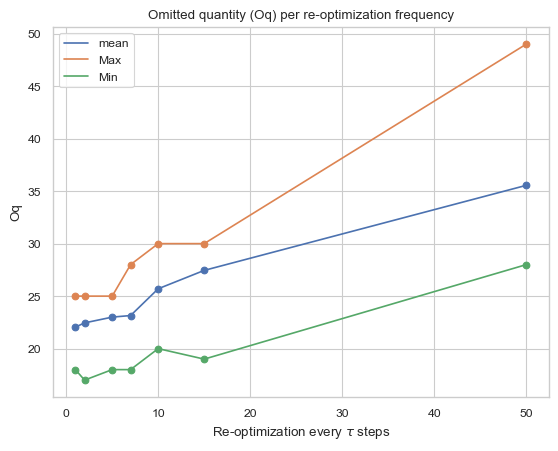

In [4]:
with open(f'results/static/different_freqs.pkl', 'rb') as f:
    res = pickle.load(f)
    
x = res['freqs']
oqs = res['oqs']
# plt.semilogx(x, oqs.mean(1), label = 'mean')
# plt.semilogx(x, oqs.max(1), label = 'Max')
# plt.semilogx(x, oqs.min(1), label = 'Min')

plt.plot(x, oqs.mean(1), label = 'mean')
plt.scatter(x, oqs.mean(1))
plt.plot(x, oqs.max(1), label = 'Max')
plt.scatter(x, oqs.max(1))
plt.plot(x, oqs.min(1), label = 'Min')
plt.scatter(x, oqs.min(1))
plt.xlabel(r'Re-optimization every $\tau$ steps')
plt.ylabel('Oq')
plt.title('Omitted quantity (Oq) per re-optimization frequency')
plt.legend()

## Real scenario

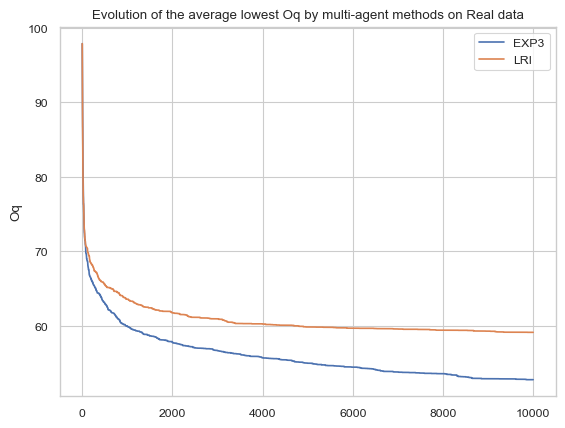

In [4]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
with open(f'results/static/{real}res_GameLearning_EXP3_K100_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K100_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by multi-agent methods on Real data")
plt.ylabel("Oq")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [5]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


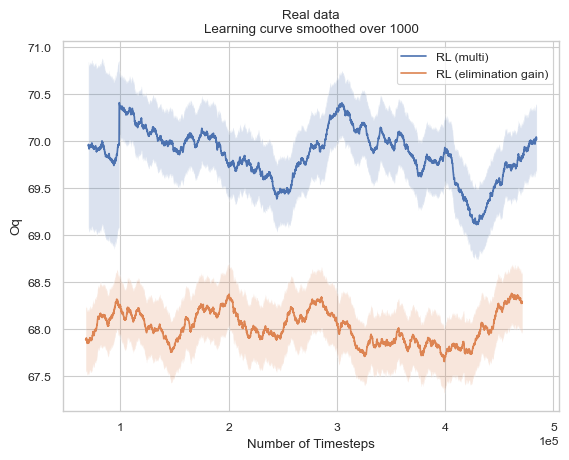

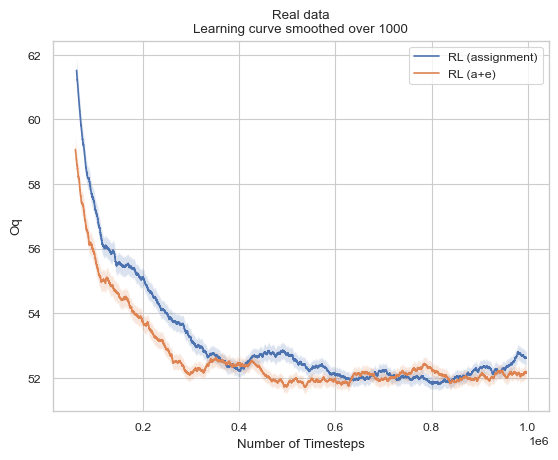

In [6]:

real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100

log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_actionMode(destinations)_steps(1000000)' #all nodes
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_steps(1000000)' #all nodes
log_dir_change_ae = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_steps(1000000)' #all nodes
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_actionMode(destinations)_steps(500000)' #all nodes
# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
# results_plotter.plot_results(
#     [log_dir_change_elimination], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
# )

x = plot_results(log_dir_change_multi, window=1000, label='RL (multi)', total_q = H)
x = plot_results(log_dir_change_elimination, window=1000, label='RL (elimination gain)', total_q = H, cap = len(x))
plt.title('Real data\nLearning curve smoothed over 1000')
plt.legend()
plt.show()
x = plot_results(log_dir_change_assignment, window=1000, label='RL (assignment)', total_q = H)
x = plot_results(log_dir_change_ae, window=1000, label='RL (a+e)', total_q = H)
plt.title('Real data\nLearning curve smoothed over 1000')
# x = plot_results(log_dir, window=50, label='RL (all nodes)')
plt.legend()

dict_keys(['res_DP', 'res_SA', 'res_greedy', 'dataRO1', 'dataRO5', 'dataRO10'])
62.05


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0.5, 1.0, 'Real data')

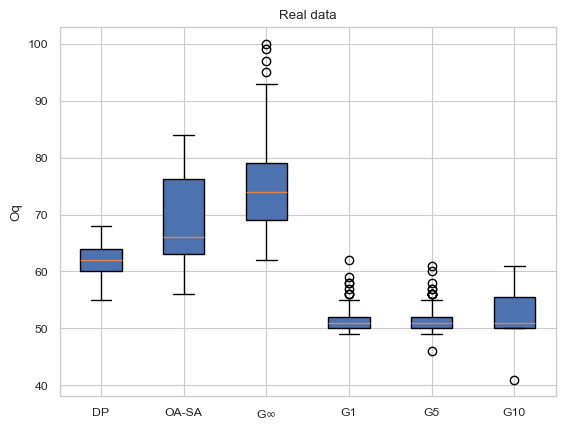

In [7]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100

with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
# with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
# with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data100['dataRO1'] = dataRO1
data100['dataRO5'] = dataRO5
data100['dataRO10'] = dataRO10

# data100['SA TSP'] = dataSATSP100['res_SA']
# print(np.mean(H - dataOff100['rs']))
# dataOff100['oq'] = H - dataOff100['rs']
# dataOff100['r'] = dataOff100['rs']
# data100['EXP3'] = EXP_VA100
# data100['LRI'] = lri_VA100

# data100['One-layer'] = dataOff100

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['DP', 'OA-SA', r'G$\infty$', 'G1', 'G5', 'G10'], K = H)
plt.ylabel('Oq')
plt.title('Real data')
# render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)

50.06
62.05


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Oq')

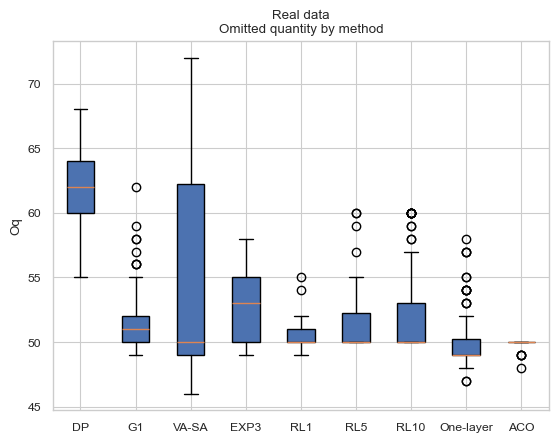

In [10]:
with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
with open(f'results/static/{real}res_ACO_K{H}_n100.pkl', 'rb') as f: dataACO = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRL10 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRL5 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRL1 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data = dict()
data['dataDP'] = data100['res_DP']
data['dataRO1'] = dataRO1
# data['dataRO5'] = dataRO5
# data['dataRO10'] = dataRO10

data['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data['EXP3'] = EXP_VA100
# data['LRI'] = lri_VA100

data['RL1'] = dataRL1
data['RL5'] = dataRL5
data['RL10'] = dataRL10
data['One-layer'] = dataOff100
data['ACO'] = dataACO['res_ACO']

# print(data.keys())
render_results(data, labels=['DP','G1', 'VA-SA', 'EXP3','RL1','RL5', 'RL10','One-layer', 'ACO'], K = H)
plt.title('Real data\nOmitted quantity by method')
plt.ylabel('Oq')

/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/218261991.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


Text(0, 0.5, 'Time (s)')

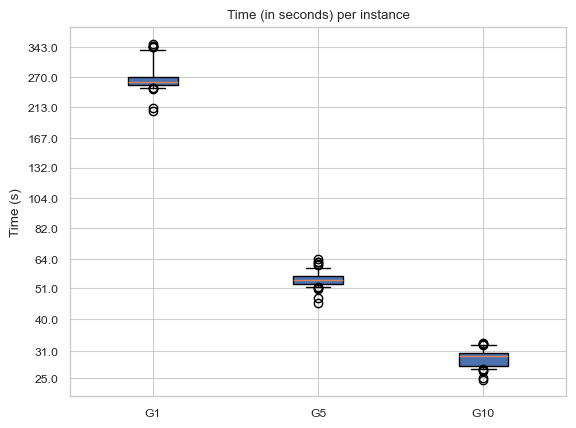

In [9]:
data ={
    'G1' : dataRO1,
    'G5' : dataRO5,
    'G10' : dataRO10,
}
times = []

for k in data:

    time = [data[k][i]['time'] for i in data[k].keys()]# if d[i]['time'] < 50]
    
    times.append(time)
        
    # rewards.append(rs)
    # n = min(len(ref), len(rewards[-1]))
    # rss = deepcopy(rewards)
    # rewards[-1][:n] /= ref[:n]
    
    # omissions.append(
    #     [
    #         len(d[i]['solution']) - np.count_nonzero(d[i]['solution'])
    #         for i in data[k].keys()
    #     ]
    # )

ax  = plt.subplot()
ax.boxplot(
    times,
    labels=data.keys(),
    patch_artist=True,
    whis=[5, 95]
    )
ax.set_yscale('log')

# ys = np.linspace(np.min(times), np.max(times), 10).round(0)
ys = np.ones(12)
ys[0] = np.min(times)
ys[1:] *= 1.27
ys = np.cumprod(ys).round(0)
ax.set_yticks(ys)
ax.set_yticklabels(ys)

plt.title('Time (in seconds) per instance')
plt.ylabel('Time (s)')

## Uniform scenario

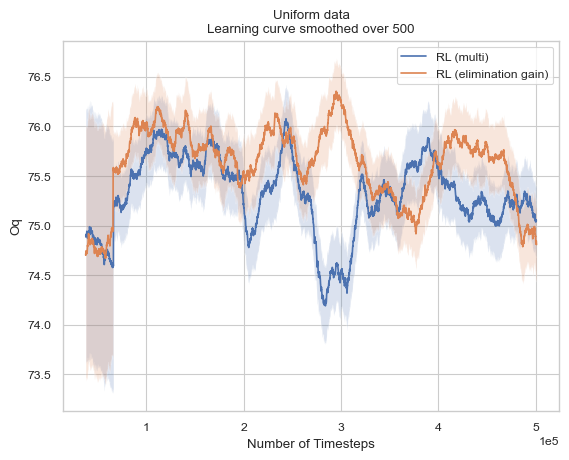

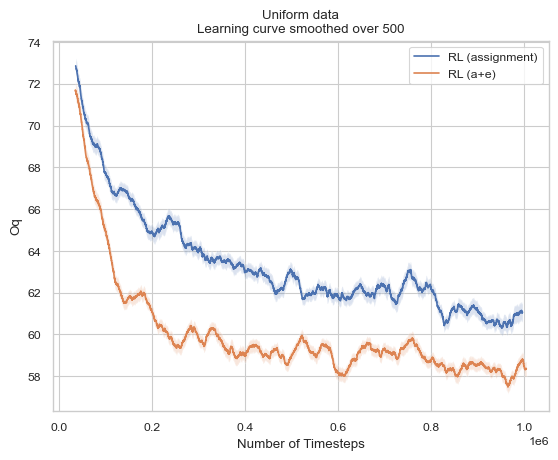

In [19]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_actionMode(destinations)_steps(500000)'
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_actionMode(all_nodes)_steps(1000000)'
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_actionMode(destinations)_steps(500000)'
log_dir_change_ae = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(all_nodes)_steps(2000000)' #all nodes
log_dir_change_ae_dest = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(destinations)_steps(500000)' #all nodes

x = plot_results(log_dir_change_multi, window=500, label='RL (multi)', total_q = H)
x = plot_results(log_dir_change_elimination, window=500, label='RL (elimination gain)', total_q = H)
plt.title('Uniform data\nLearning curve smoothed over 500')
plt.legend()
plt.show()
x = plot_results(log_dir_change_assignment, window=500, label='RL (assignment)', total_q = H)
x = plot_results(log_dir_change_ae, window=500, label='RL (a+e)', total_q = H, cap = len(x)+1000)
plt.title('Uniform data\nLearning curve smoothed over 500')
# x = plot_results(log_dir_change_ae_dest, window=500, label='RL (a+e gain dest)', total_q = H)
plt.legend()

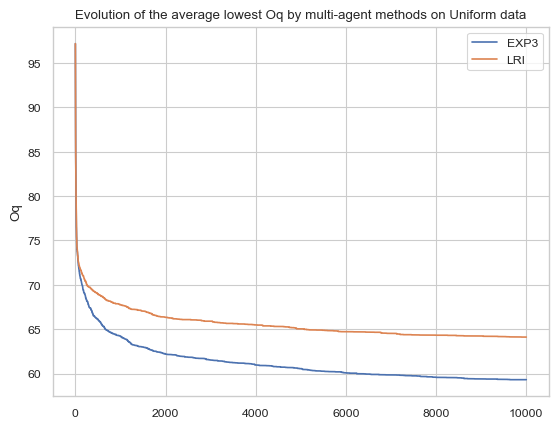

In [20]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100
with open(f'results/static/{real}res_GameLearning_EXP3_K100_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K100_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by multi-agent methods on Uniform data")
plt.ylabel("Oq")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [21]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


dict_keys(['res_DP', 'res_SA', 'res_greedy', 'dataRO1', 'dataRO5', 'dataRO10'])
63.28


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0.5, 1.0, 'Uniform data')

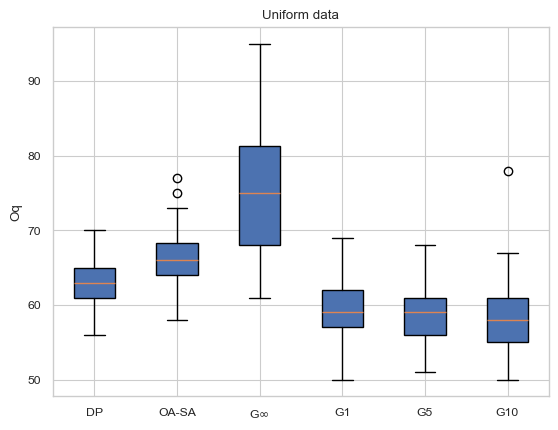

In [22]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100

with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
# with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
# with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data100['dataRO1'] = dataRO1
data100['dataRO5'] = dataRO5
data100['dataRO10'] = dataRO10

# data100['SA TSP'] = dataSATSP100['res_SA']
# print(np.mean(H - dataOff100['rs']))
# dataOff100['oq'] = H - dataOff100['rs']
# dataOff100['r'] = dataOff100['rs']
# data100['EXP3'] = EXP_VA100
# data100['LRI'] = lri_VA100

# data100['One-layer'] = dataOff100

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['DP', 'OA-SA', r'G$\infty$', 'G1', 'G5', 'G10'], K = H)
plt.ylabel('Oq')
plt.title('Uniform data')
# render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)

58.2
63.28


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Oq')

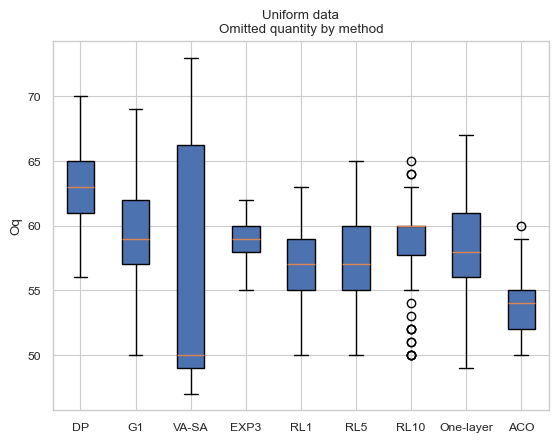

In [24]:
real_data = False
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 100

with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
with open(f'results/static/{real}res_ACO_K{H}_n100.pkl', 'rb') as f: dataACO = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRL10 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRL5 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRL1 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data = dict()
data['dataDP'] = data100['res_DP']
data['dataRO1'] = dataRO1
# data['dataRO5'] = dataRO5
# data['dataRO10'] = dataRO10

data['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data['EXP3'] = EXP_VA100
# data['LRI'] = lri_VA100

data['RL1'] = dataRL1
data['RL5'] = dataRL5
data['RL10'] = dataRL10
data['One-layer'] = dataOff100
data['ACO'] = dataACO['res_ACO']

# print(data.keys())
render_results(data, labels=['DP','G1', 'VA-SA', 'EXP3','RL1','RL5', 'RL10','One-layer', 'ACO'], K = H)
plt.title('Uniform data\nOmitted quantity by method')
plt.ylabel('Oq')
# render_results(data, labels=['DP','G1', 'G5', 'G10', 'VA-SA', 'EXP3', 'LRI','RL1','RL5', 'RL10','One-layer'], K = H)

## Cluster

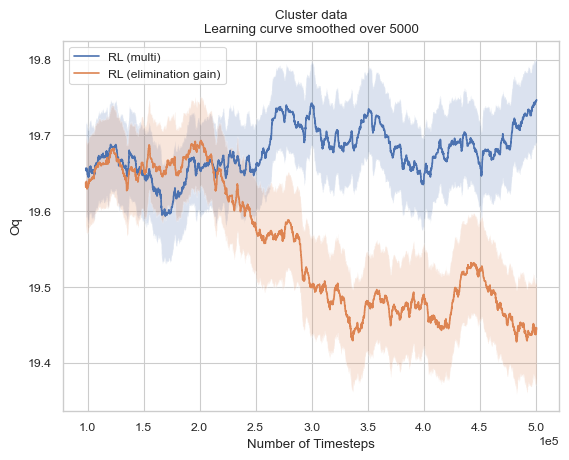

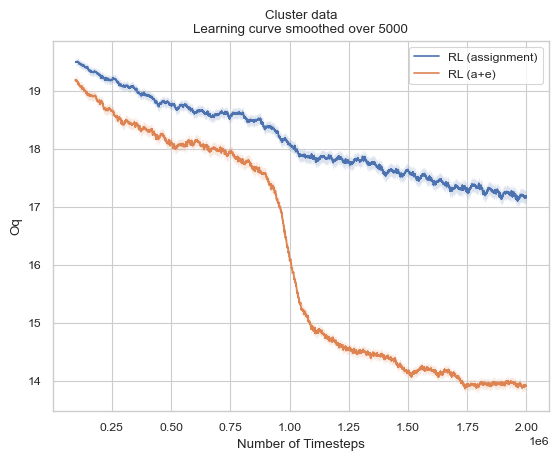

In [11]:
real_data = False
cluster_data = True
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 50
log_dir_change_multi = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(multi)_actionMode(destinations)_steps(500000)'
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_actionMode(all_nodes)_steps(500000)'
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(assignment)_actionMode(all_nodes)_steps(2000000)'
log_dir_change_elimination = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(elimination_gain)_actionMode(destinations)_steps(500000)'
log_dir_change_ae = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(all_nodes)_steps(1000000)' #all nodes
log_dir_change_ae = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(all_nodes)_steps(2000000)' #all nodes
log_dir_change_ae_dest = f'methods/static/ppo_mask/{real}K{H}_rewardMode(aq)_obsMode(a+e)_actionMode(destinations)_steps(500000)' #all nodes

x = plot_results(log_dir_change_multi, window=5000, label='RL (multi)', total_q = H)
x = plot_results(log_dir_change_elimination, window=5000, label='RL (elimination gain)', total_q = H)
# x = plot_results(log_dir_change_ae_dest, window=5000, label='RL (a+e gain dest)', total_q = H)
plt.title('Cluster data\nLearning curve smoothed over 5000')
plt.legend()
plt.show()
x = plot_results(log_dir_change_assignment, window=5000, label='RL (assignment)', total_q = H)
x = plot_results(log_dir_change_ae, window=5000, label='RL (a+e)' , total_q = H)
plt.title('Cluster data\nLearning curve smoothed over 5000')
plt.legend()

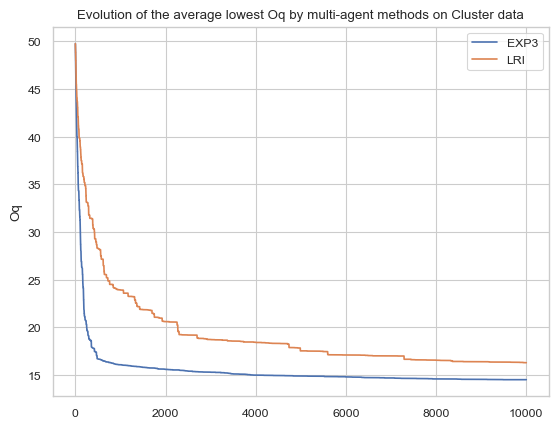

In [12]:
real_data = False
cluster_data = True
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 50
with open(f'results/static/{real}res_GameLearning_EXP3_K{H}_n100.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K{H}_n100.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by multi-agent methods on Cluster data")
plt.ylabel("Oq")
plt.legend()

In [13]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


dict_keys(['res_DP', 'res_SA', 'res_greedy', 'dataRO1', 'dataRO5', 'dataRO10'])
12.44


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0.5, 1.0, 'Cluster data')

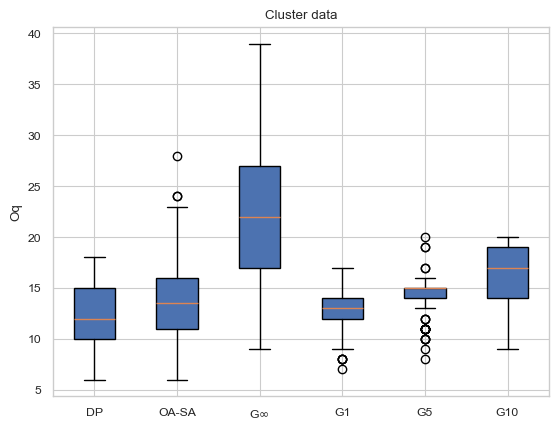

In [14]:
with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
# with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
# with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data100['dataRO1'] = dataRO1
data100['dataRO5'] = dataRO5
data100['dataRO10'] = dataRO10

# data100['SA TSP'] = dataSATSP100['res_SA']
# print(np.mean(H - dataOff100['rs']))
# dataOff100['oq'] = H - dataOff100['rs']
# dataOff100['r'] = dataOff100['rs']
# data100['EXP3'] = EXP_VA100
# data100['LRI'] = lri_VA100

# data100['One-layer'] = dataOff100

# del data100['res_A']
print(data100.keys())

render_results(data100, labels=['DP', 'OA-SA', r'G$\infty$', 'G1', 'G5', 'G10'], K = H)
plt.ylabel('Oq')
plt.title('Cluster data')

In [15]:
# with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
# with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
# with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)

# with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
# with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
# with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

# data100['dataRO1'] = dataRO1
# data100['dataRO5'] = dataRO5
# data100['dataRO10'] = dataRO10

# data100['SA TSP'] = dataSATSP100['res_SA']
# print(np.mean(H - dataOff100['rs']))
# dataOff100['oq'] = H - dataOff100['rs']
# dataOff100['r'] = dataOff100['rs']
# data100['EXP3'] = EXP_VA100
# data100['LRI'] = lri_VA100

# data100['One-layer'] = dataOff100

# # del data100['res_A']
# print(data100.keys())
# render_results(data100, labels=['DP', 'OA-SA', r'G$\infty$', 'G1', 'G5', 'G10', 'VA-SA', 'EXP3', 'LRI', 'One-layer'], K = H)
# # render_results(data100, labels=['DP', 'OA-SA', 'Greedy','VA-SA',  'EXP3', 'LRI'], K = 100)

12.06
12.44


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_75875/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Oq')

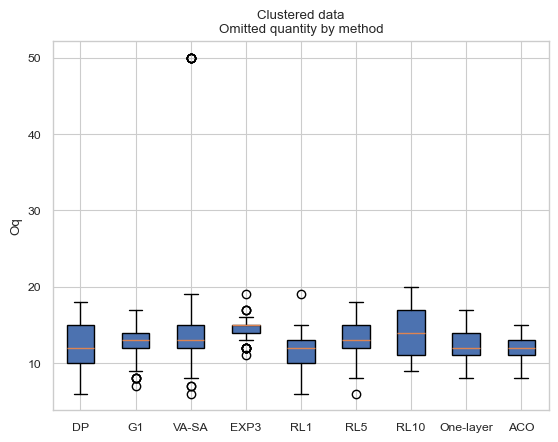

In [18]:
with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)
with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
with open(f'results/static/{real}res_ACO_K{H}_n100.pkl', 'rb') as f: dataACO = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRL10 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRL5 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRL1 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data = dict()
data['dataDP'] = data100['res_DP']
data['dataRO1'] = dataRO1
# data['dataRO5'] = dataRO5
# data['dataRO10'] = dataRO10

data['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
data['EXP3'] = EXP_VA100
# data['LRI'] = lri_VA100

data['RL1'] = dataRL1
data['RL5'] = dataRL5
data['RL10'] = dataRL10
data['One-layer'] = dataOff100
data['ACO'] = dataACO['res_ACO']

# print(data.keys())
render_results(data, labels=['DP','G1', 'VA-SA', 'EXP3','RL1','RL5', 'RL10','One-layer', 'ACO'], K = H)
# render_results(data, labels=['DP','G1', 'G5', 'G10', 'VA-SA', 'EXP3', 'LRI','RL1','RL5', 'RL10','One-layer'], K = H)
plt.title('Clustered data\nOmitted quantity by method')
plt.ylabel('Oq')

## Different quantities

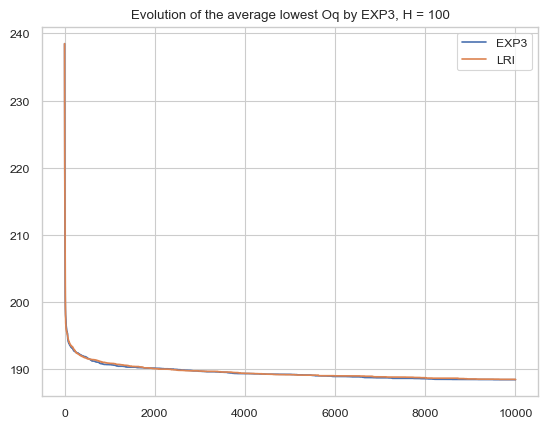

In [7]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
comment = '_different_quantities'
H = 100
with open(f'results/static/{real}res_GameLearning_EXP3_K{H}_n100{comment}.pkl', 'rb') as f:
    EXP_VA = pickle.load(f)
    
with open(f'results/static/{real}res_GameLearning_LRI_K{H}_n100{comment}.pkl', 'rb') as f:
    LRI_VA = pickle.load(f)

# plt.plot(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0))
plt.plot(np.mean([np.minimum.accumulate(np.array(EXP_VA[i]['oqs'])) for i in EXP_VA.keys()], axis=0), label='EXP3')
plt.plot(np.mean([np.minimum.accumulate(np.array(LRI_VA[i]['oqs'])) for i in LRI_VA.keys()], axis=0), label='LRI')
# plot_curves(*moving_average(np.mean([np.maximum.accumulate(np.array(EXP_VA[i]['rewards'])) for i in EXP_VA.keys()], axis=0), 50))
# plt.title("Evolution of the average best reward by EXP3, d = 100")
plt.title("Evolution of the average lowest Oq by EXP3, H = 100")
plt.legend()
# plt.plot()
# print(np.mean([EXP_VA[i]['r'] for i in dataEXP_VA2.keys()]))
# print([dataEXP_VA[i]['solution'] for i in dataEXP_VA2.keys()])

In [8]:
EXP_VA100 = {
    i : {
        'r' : np.max(EXP_VA[i]['rewards']),
        'oq' : np.min(EXP_VA[i]['oqs']),
        'time' : EXP_VA[i]['time']
    }
    for i in EXP_VA.keys()
}

lri_VA100 = {
    i : {
        'r' : np.max(LRI_VA[i]['rewards']),
        'oq' : np.min(LRI_VA[i]['oqs']),
        'time' : LRI_VA[i]['time']
    }
    for i in LRI_VA.keys()
}


-7.22
dict_keys(['dataRO1', 'SA TSP', 'RL1', 'One-layer', 'ACO'])
49.17


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_3227/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Oq')

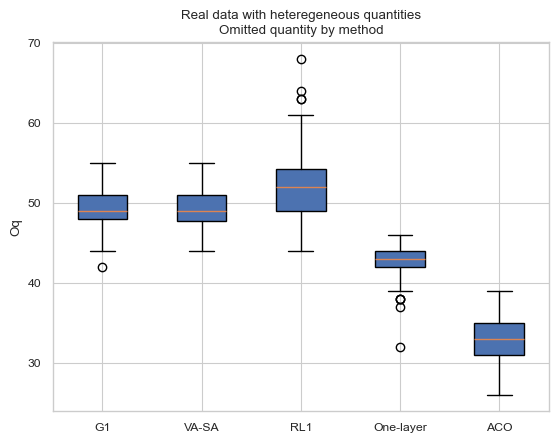

In [9]:
# with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100{comment}.pkl', 'rb') as f: data100 = pickle.load(f)
H = 50
with open(f'results/static/{real}res_SA_VA_K{H}_n100{comment}.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/different_quantities_res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
with open(f'results/static/{real}res_RL_K{H}_n100_RO1_different_quantities.pkl', 'rb') as f: dataRL1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_RO1{comment}.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_ACO_K{H}_n100_different_quantities.pkl', 'rb') as f: dataACO = pickle.load(f)

data100 = dict()
data100['dataRO1'] = dataRO1
data100['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = 100 - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']

data100['RL1'] = dataRL1
# data100['EXP3'] = EXP_VA100

data100['One-layer'] = dataOff100
data100['ACO'] = dataACO['res_ACO']

# del data100['res_A']
print(data100.keys())
render_results(data100, labels=['G1', 'VA-SA', 'RL1', 'One-layer', 'ACO'], K = 50)
plt.title('Real data with heteregeneous quantities\nOmitted quantity by method')
plt.ylabel('Oq')
# render_results(data100, labels=['G1', 'VA-SA', 'EXP3', 'One-layer'], K = 50)

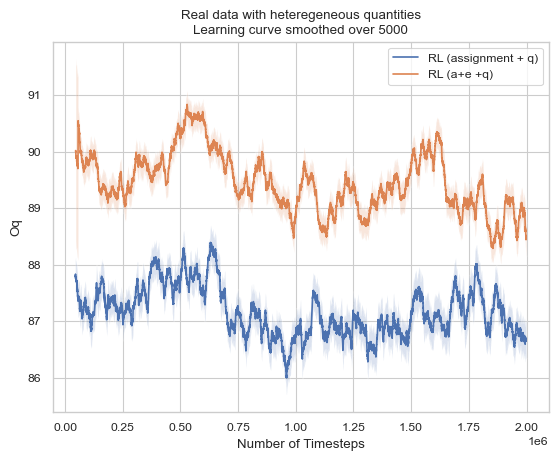

In [25]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""

H = 50
qs = np.load(f'data/quantities_K50.npy')
log_dir_change_assignment = f'methods/static/ppo_mask/{real}K50_rewardMode(aq)_obsMode(assignment_q)_actionMode(all_nodes)_steps(2000000)' #all nodes
log_dir_change_ae = f'methods/static/ppo_mask/{real}K50_rewardMode(aq)_obsMode(a+e_q)_actionMode(all_nodes)_steps(2000000)' #all nodes

# x = plot_results(log_dir_change_multi, window=250, label='RL (multi)', total_q = np.mean(qs.sum(1)))
x = plot_results(log_dir_change_assignment, window=1000, label='RL (assignment + q)', total_q = np.mean(qs.sum(1)))
x = plot_results(log_dir_change_ae, window=1000, label='RL (a+e +q)', total_q = np.mean(qs.sum(1)))
plt.title('Real data with heteregeneous quantities\nLearning curve smoothed over 5000')
plt.legend()

In [26]:
qs.sum(1).shape

(100,)

In [27]:
# H = 50
# qs = np.ones((100, H), dtype=int)
# C = 25 * 4 - H/2 - 4# (5) - H
# c = (C*np.random.dirichlet(np.ones(H), size = (100))).astype(int)
# qs += c
# print(qs.sum(1))
# qs
# np.save(f'data/quantities_K{H}.npy', qs)

## Resuts small

In [4]:
real_data = True
cluster_data = False
real = "real_" if real_data else "cluster_" if cluster_data else ""
H = 20

7.5
8.55


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_98677/2241069172.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


Text(0, 0.5, 'Oq')

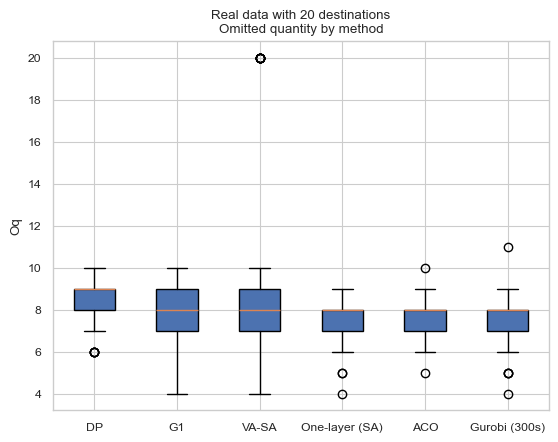

In [37]:
with open(f'results/static/{real}res_compare_DP_greedy_OASA_K{H}_n100.pkl', 'rb') as f: data100 = pickle.load(f)

with open(f'results/static/{real}res_SA_VA_K{H}_n100.pkl', 'rb') as f: dataSATSP100 = pickle.load(f)
with open(f'results/static/{real}res_offline_K{H}.pkl', 'rb') as f: dataOff100 = pickle.load(f)
with open(f'results/static/{real}res_ACO_K{H}_n100.pkl', 'rb') as f: dataACO = pickle.load(f)
with open(f'results/static/{real}res_gurobi_K{H}_n100.pkl', 'rb') as f: dataGuro = pickle.load(f)
# with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRL10 = pickle.load(f)
# with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRL5 = pickle.load(f)
# with open(f'results/static/{real}res_RL_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRL1 = pickle.load(f)

with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery1.pkl', 'rb') as f: dataRO1 = pickle.load(f)
with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery5.pkl', 'rb') as f: dataRO5 = pickle.load(f)
# with open(f'results/static/{real}res_greedy_K{H}_n100_ReOptimizedEvery10.pkl', 'rb') as f: dataRO10 = pickle.load(f)

data = dict()
data['dataDP'] = data100['res_DP']
data['dataRO1'] = dataRO1
# data['dataRO5'] = dataRO5
# data['dataRO10'] = dataRO10

data['SA TSP'] = dataSATSP100['res_SA']
print(np.mean(H - dataOff100['rs']))
dataOff100['oq'] = H - dataOff100['rs']
dataOff100['r'] = dataOff100['rs']
# data['EXP3'] = EXP_VA100
# data['LRI'] = lri_VA100

# data['RL1'] = dataRL1
# data['RL5'] = dataRL5
# data['RL10'] = dataRL10
data['One-layer'] = dataOff100
data['ACO'] = dataACO['res_ACO']
for i in range(100):
    data['ACO'][i]['oq'] += 1
data['Gurobi'] = dataGuro

# print(data.keys())
# render_results(data, labels=['DP','G1', 'VA-SA', 'EXP3','RL1','RL5', 'RL10','One-layer', 'ACO'], K = H)
render_results(data, labels=['DP','G1', 'VA-SA','One-layer (SA)', 'ACO', 'Gurobi (300s)'], K = H)
plt.title('Real data with 20 destinations\nOmitted quantity by method')
plt.ylabel('Oq')